# Проект: Исследование стартапов

## Введение

### Цели и задачи проекта

**Цель:** Подготовка данных и их проверка. Ответить на вопросы заказчика по предобработке и о значении данных для бизнеса.

**Задачи**
1. Загрузить данные и ознакомиться с содержимым.
2. Провести предобработку данных с предварительным исследованием.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.

### Данные

Для анализа предоставлены следующие данные:

- `company_and_rounds.csv`
- `acquisition.csv`
- `people.csv`
- `education.csv`
- `degrees.csv`
- `fund.csv`
- `investment.csv`

### Структура проекта

1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ объединённых таблиц.
4. Итоговый вывод и рекомендации.
---


## Знакомство с данными: загрузка и первичная предобработка

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в отдельных переменных: `rest_df` и `price_df`

In [45]:
# Импортируем библиотеки
import numpy as np
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

In [46]:
# Выгружаем данные в переменные
car_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acqui_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
educ_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degr_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
invest_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [47]:
# Выведем названия столбцов company_and_rounds
car_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [48]:
# Выведем названия столбцов acquisition
acqui_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [49]:
# Выведем названия столбцов people
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [50]:
# Выведем названия столбцов education
educ_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [51]:
# Выведем названия столбцов degrees
degr_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Из всех датасетов только company_and_rounds нужно привести к стилю snake case

In [52]:
car_df = car_df.rename(columns={'company  id': 'company_id_p'})

In [53]:
# Приводим названия столбоцов к стилю snake case
car_df.columns = car_df.columns.str.lower().str.replace('  ', '_')
car_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_p', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Познакомимся с данными — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [54]:
# Выводим первые строки датафрейма на экран
car_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_p,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Выводим информацию о датафрейме
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_p         52928 non-null   float64
 15  funded_at        

Датасет содержит 22 столбца и 217774 строк.

Выводы первичного анализа:
- Данные хранятся в типах `float64`, `object`;
- Столбцы `milestones`, `participants`, `is_first_round`, `is_last_round` — можно оптимизировать по размерности данных;
- Столбцы `founded_at`, `funded_at` — можно привести к типу `datetime64`;
- Столбцы `name`, `network_username` — приведём к нижнему регистру;
- По первому анализу данные в столбцах соответствуют названию.

In [56]:
# Выводим первые строки датафрейма на экран
acqui_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [57]:
# Выводим информацию о датафрейме
acqui_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет содержит 6 столбцов и 9407 строк.

Выводы первичного анализа:
- Данные хранятся в типах `int64`, `object`;
- Столбцы `id`, `acquiring_company_id`, `acquired_company_id` — можно оптимизировать по размерности данных;
- Столбец `acquired_at` — можно привести к типу `datetime64`
- По первому анализу данные в столбцах соответствуют названию.

In [58]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [59]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет содержит 6 столбцов и 226709 строк.

Выводы первичного анализа:
- Данные хранятся в типах `float64`, `int64`, `object`;
- Столбцы `first_name`, `last_name`, `network_username` — приведём к нижнему регистру;
- По первому анализу данные в столбцах соответствуют названию.

In [60]:
# Выводим первые строки датафрейма на экран
educ_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [61]:
# Выводим информацию о датафрейме
educ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет содержит 4 столбца и 109610 строк.

Выводы первичного анализа:
- Данные хранятся в типах `int64`, `object`;
- Столбцы `id`, `person_id` — можно оптимизировать по размерности данных;
- Столбец `graduated_at` — можно привести к типу `datetime64`;
- Столбец `instituition` — приведём к нижнему регистру;
- По первому анализу данные в столбцах соответствуют названию.

In [62]:
# Выводим первые строки датафрейма на экран
degr_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [63]:
# Выводим информацию о датафрейме
degr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет содержит 4 столбца и 109610 строк.

Выводы первичного анализа:
- Столбец `id` — можно оптимизировать по размерности данных;
- Столбец `subject` — приведём к нижнему регистру;
- По первому анализу данные в столбцах соответствуют названию.

In [64]:
# Выводим первые строки датафрейма на экран
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [65]:
# Выводим информацию о датафрейме
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет содержит 11652 строки и 9 столбцов

In [66]:
# Выводим первые строки датафрейма на экран
invest_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [67]:
# Выводим информацию о датафрейме
invest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет содержит 61403 строки и 4 столбца

### Смена типов и анализ пропусков

#### Смена типов

In [68]:
# Оптимизируем тип данных в car_df
car_df['milestones'] = pd.to_numeric(car_df['milestones'], downcast='float')
car_df['participants'] = pd.to_numeric(car_df['participants'], downcast='float')
car_df['is_first_round'] = pd.to_numeric(car_df['is_first_round'], downcast='float')
car_df['is_last_round'] = pd.to_numeric(car_df['is_last_round'], downcast='float')

In [69]:
# Приведём столбцы к временному формату данных
car_df['founded_at'] = car_df['founded_at'].astype('datetime64')
car_df['funded_at'] = car_df['funded_at'].astype('datetime64')
car_df.dtypes

company_id                    float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at                      object
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float32
funding_round_id              float64
company_id_p                  float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float32
is_first_round                float32
is_last_round                 float32
dtype: object

In [70]:
# Приведём столбцы name и network_username к нижнему регистру
car_df['name'] = car_df['name'].str.lower()
car_df['network_username'] = car_df['network_username'].str.lower()

# Выведем результат
car_df[['name', 'network_username']].head()

,name,network_username
0,wetpaint,bachelrwetpaint
1,wetpaint,bachelrwetpaint
2,wetpaint,bachelrwetpaint
3,flektor,NaN
4,there,NaN


In [71]:
# Оптимизируем тип данных в acqui_df
acqui_df['id'] = pd.to_numeric(acqui_df['id'], downcast='integer')
acqui_df['acquiring_company_id'] = pd.to_numeric(acqui_df['acquiring_company_id'], downcast='integer')
acqui_df['acquired_company_id'] = pd.to_numeric(acqui_df['acquired_company_id'], downcast='integer')

# Приведём столбец acquired_at к типу данных datetime64
acqui_df['acquired_at'] = acqui_df['acquired_at'].astype('datetime64')

# Выведем результат
acqui_df.dtypes

id                               int16
acquiring_company_id             int32
acquired_company_id              int32
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [72]:
# Приведём столбцы first_name, last_name, network_username к нижнему регистру
people_df['first_name'] = people_df['first_name'].str.lower()
people_df['last_name'] = people_df['last_name'].str.lower()
people_df['network_username'] = people_df['network_username'].str.lower()

# Выведем результат
people_df[['first_name', 'last_name', 'network_username']].head()

,first_name,last_name,network_username
0,mark,zuckerberg,NaN
1,peter,lester,NaN
2,dr. steven,e. saunders,NaN
3,neil,capel,NaN
4,sue,pilsch,NaN


In [73]:
# Оптимизируем тип данных в educ_df
educ_df['id'] = pd.to_numeric(educ_df['id'], downcast='integer')
educ_df['person_id'] = pd.to_numeric(educ_df['person_id'], downcast='integer')

# Приведём столбец graduated_at к типу datetime64
educ_df['graduated_at'] = educ_df['graduated_at'].astype('datetime64')

# Выведем результат
educ_df.dtypes

id                       int32
person_id                int32
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [74]:
# Приведём столбец instituition к нижнему регистру
educ_df['instituition'] = educ_df['instituition'].str.lower()

# Выведем результат
educ_df['instituition'].head()

0                                 NaN
1    washington university, st. louis
2                   boston university
3             university of greenwich
4                     rice university
Name: instituition, dtype: object

In [75]:
# Оптимизируем тип данных в degr_df
degr_df['id'] = pd.to_numeric(degr_df['id'], downcast='integer')

# Выведем результат
degr_df.dtypes

id              int32
object_id      object
degree_type    object
subject        object
dtype: object

In [76]:
# Приведём столбец instituition к нижнему регистру
degr_df['subject'] = degr_df['subject'].str.lower()

# Выведем результат
degr_df['subject'].head()

0                             NaN
1                 english, french
2              mass communication
3             internet technology
4    computer science, psychology
Name: subject, dtype: object

#### Анализ пропусков

In [77]:
# Выводим на экран количество пропусков в каждом столбце и их долю датасета car_df
print('Количество пропусков в каждом столбце:')
print(car_df.isna().sum())
print()
print('Доля пропусков в каждом столбце:')
print(car_df.isna().mean())

Количество пропусков в каждом столбце:
company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_p           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

Доля пропусков в каждом столбце:
company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.56131

По первичному анализу сразу хочется обратить внимание на однородную долю пропусков со столбца `funding_round_id`, исследуем это явление далее. Удалять данные нецелесообразно, так как мы рискуем потерять их большую часть. Значительная доля первой части данных (до столбца `funding_round_id`) содержит категориальные и временные данные. Замена или подставление данных привёдет к  их искажению. Верным решением будет оставить данные в исходном виде. 

In [78]:
# Выводим на экран количество пропусков в каждом столбце и их долю датасета acqui_df
print('Количество пропусков в каждом столбце:')
print(acqui_df.isna().sum())
print()
print('Доля пропусков в каждом столбце:')
print(acqui_df.isna().mean())

Количество пропусков в каждом столбце:
id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

Доля пропусков в каждом столбце:
id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64


Наличие пропусков только в столбцах `term_code` и `acquired_at` вероятнее всего ошибка при сборе данных, либо значения не были указаны изначально. Замена или удаление так же не корректны, оставляем данные.

In [79]:
# Выводим на экран количество пропусков в каждом столбце и их долю датасета people_df
print('Количество пропусков в каждом столбце:')
print(people_df.isna().sum())
print()
print('Доля пропусков в каждом столбце:')
print(people_df.isna().mean())

Количество пропусков в каждом столбце:
id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

Доля пропусков в каждом столбце:
id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64


В столбцах `first_name` и `last_name` данные либо небыли заполнены, либо при выгрузке произошла ошибка. Это же касается столбцов `company_id` и `network_username`. Удаляя пропуски мы теряем большое количество данных, оставим данные в исходном виде.

In [80]:
# Выводим на экран количество пропусков в каждом столбце и их долю датасета educ_df
print('Количество пропусков в каждом столбце:')
print(educ_df.isna().sum())
print()
print('Доля пропусков в каждом столбце:')
print(educ_df.isna().mean())

Количество пропусков в каждом столбце:
id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

Доля пропусков в каждом столбце:
id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64


In [81]:
# Выводим на экран количество пропусков в каждом столбце и их долю датасета degr_df
print('Количество пропусков в каждом столбце:')
print(degr_df.isna().sum())
print()
print('Доля пропусков в каждом столбце:')
print(degr_df.isna().mean())

Количество пропусков в каждом столбце:
id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

Доля пропусков в каждом столбце:
id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64


`degree_type`, `subject` содержат данные о типе образования и специальности, эти данные нам не понадобятся в дальнейшем исследовании. Оставим их как есть.

В данных много пропущенных значений, однако их нам хватит для решения задач.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам

In [82]:
# Выделим год из даты финансирования
car_df['funded_at'] = car_df['funded_at'].dt.year

In [83]:
# Создадим сводную таблицу финансирования
pivot_found = pd.pivot_table(car_df,
                             index='funded_at',
                             values='raised_amount',
                             aggfunc={'raised_amount': ['median', 'count']})
pivot_found

,count,median
funded_at,,
1960.0,9,0.0
1973.0,1,0.0
1974.0,2,0.0
1984.0,3,41000.0
1985.0,1,0.0
1987.0,2,1250000.0
1989.0,1,15000.0
1990.0,1,1000000.0
1992.0,1,2000000.0


In [84]:
# Отфильтруем полученную таблицу
filter_found = pivot_found[pivot_found['count'] > 50]
filter_found

,count,median
funded_at,,
1999.0,76,2000000.0
2000.0,125,4200000.0
2001.0,96,3000000.0
2002.0,116,4200000.0
2003.0,159,3000000.0
2004.0,291,5000000.0
2005.0,1633,5500000.0
2006.0,2436,5000000.0
2007.0,3279,3973320.0


array([<AxesSubplot:title={'center':'Количество раундов финансирования'}, xlabel='Год'>,
       <AxesSubplot:title={'center':'Медианное финансирование по годам (млн. $)'}, xlabel='Год'>],
      dtype=object)

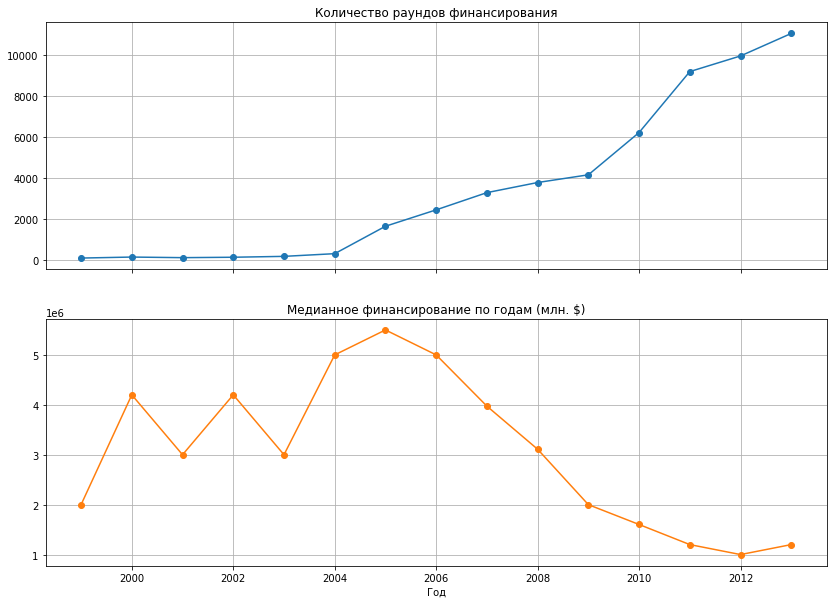

In [85]:
filter_found.plot(kind='line',
                  subplots=True,
                  sharex=True,
                  sharey=False,
                  figsize=(14,10),
                  marker='o',
                  grid = True,
                  legend=False,
                  title=['Количество раундов финансирования', 'Медианное финансирование по годам (млн. $)'],
                  xlabel='Год')

Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году. 
Количество раундов значительно увеличилось к 2013 году и является максимальным. Суммы финансирования пошли на повышение и сравнялись с результатами 2011 года.


### Люди и их образование

In [87]:
# Переименуем названия столбцов для более удобного объединения датасетов
educ_df = educ_df.rename(columns={'id': 'education_id', 'person_id': 'id'})
educ_df.columns

Index(['education_id', 'id', 'instituition', 'graduated_at'], dtype='object')

Датасет `degr_df` содержит информацию о типе образования сотрудника. Информация такого рода для решения задачи нам не понадобится.

In [88]:
# Объединяем данные
merge_df = people_df.merge(educ_df, on='id', how='outer')

In [89]:
# Создадим сводную таблицу
pivot_educ = pd.pivot_table(merge_df,
                            index='company_id',
                            values=['id', 'education_id'],
                            aggfunc={'id': 'count',
                                     'education_id': 'count'})
pivot_educ

,education_id,id
company_id,,
1.0,2,3
2.0,1,1
3.0,4,5
4.0,17,18
5.0,68,84
...,...,...
285897.0,2,2
285953.0,0,1
285972.0,1,2


In [90]:
# Создадим новый столбец с долей сотрудиков без образования
pivot_educ['non_educ'] = 1 - (pivot_educ['education_id'] / pivot_educ['id'])
pivot_educ

,education_id,id,non_educ
company_id,,,
1.0,2,3,0.333333
2.0,1,1,0.000000
3.0,4,5,0.200000
4.0,17,18,0.055556
5.0,68,84,0.190476
...,...,...,...
285897.0,2,2,0.000000
285953.0,0,1,1.000000
285972.0,1,2,0.500000


Для дальнешего исследования и назначения категорий кампаниям, выведем распередение сотрудников. Для этого отлично подойдёт "ящик с усами".

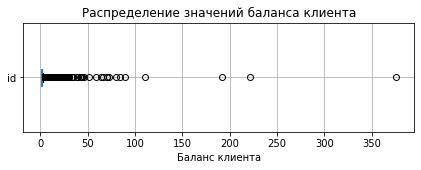

In [91]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
pivot_educ.boxplot(column='id', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений баланса клиента')
plt.xlabel('Баланс клиента')

# Выводим график
plt.show()

По распеределению данных можно сделать вывод что основная доля варируется от 1 до 5. Выделим рамки категорий в соответствии с распределением.

In [92]:
# Напишем функцию привающую категорию компании от кол-ва сотрудников
def cat_comp(row):
    if 0 < row['id'] <= 1:
        return "1"
    elif 2 <= row['id'] <= 3:
        return "2-3"
    elif 4 <= row['id'] <= 5:
        return "4-5"
    elif 6 <= row['id'] <= 10:
        return "6-10"
    elif 11 <= row['id'] <= 25:
        return "11-25"
    elif 26 <= row['id'] <= 50:
        return "26-50"
    elif 51 <= row['id'] <= 100:
        return "51 - 100"
    elif 100 < row['id']:
        return "100+"

# Создадим новый столбец с категориями    
pivot_educ['personal_cat'] = pivot_educ.apply(cat_comp, axis=1)
pivot_educ

,education_id,id,non_educ,personal_cat
company_id,,,,
1.0,2,3,0.333333,2-3
2.0,1,1,0.000000,1
3.0,4,5,0.200000,4-5
4.0,17,18,0.055556,11-25
5.0,68,84,0.190476,51 - 100
...,...,...,...,...
285897.0,2,2,0.000000,2-3
285953.0,0,1,1.000000,1
285972.0,1,2,0.500000,2-3


In [93]:
cat_rat = pivot_educ.groupby('personal_cat')['non_educ'].mean()
cat_rat.sort_values(ascending = False)

personal_cat
1           0.592297
6-10        0.311749
11-25       0.306125
4-5         0.275743
2-3         0.226841
26-50       0.218573
51 - 100    0.182986
100+        0.175489
Name: non_educ, dtype: float64

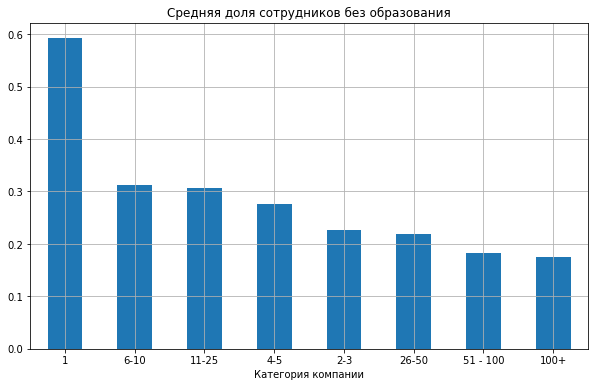

In [94]:
# Построим визуализацию по полученным данным
plt.figure(figsize=(10, 6))

cat_rat.sort_values(ascending = False).plot(
               kind='bar', 
               rot=0, 
               legend=False, 
               title=f'Средняя доля сотрудников без образования')

plt.xlabel('Категория компании')
plt.grid()

plt.show()

Категории для компаний взяты согласно распределению. Среди всех категорий, больше всего самозанятых без образования, почти 60%. Четкой тенденции на снижение в зависимости от категории не прослеживается, до компаний от 26 сотрудников. Далее прослеживается спад к категории 100+.

### Объединять или не объединять — вот в чём вопрос

Столбец `network_username` находится в двух датасетах: `car_df` и `people_df`. Ожидается что для каждой компании будет указан ник в сети, значит для `company_id` будет соответствующий `network_username`.

In [95]:
car_df_us = car_df.dropna(subset=['network_username'])
car_df_com = car_df.dropna(subset=['company_id'])

In [96]:
# Проверим явные дубликаты строк в car_df
car_df.duplicated().sum()

0

In [97]:
# Проверим явные дубликаты в столбце network_username
car_df_us.duplicated(subset='network_username').sum()

16160

In [98]:
# Найдем долю дубликатов от всех данных
car_df_us.duplicated(subset='network_username').sum() / len(car_df)

0.07420536886864364

In [99]:
# Проверим явные дубликаты для столбца company_id
car_df_com.duplicated(subset='company_id').sum()

20919

In [100]:
# Найдём количество данных для network_username
car_df_us['network_username'].count()

95534

In [101]:
# Найдём количество данных для network_username
car_df_com['company_id'].count()

217472

Доля дубликатов в столбце `network_username` - 0.07. Количество дубликатов у `network_username` меньше, чем у `company_id`. Так же прослеживается нехватка данных по сравнению с `company_id`. 

In [102]:
people_df_com = people_df.dropna(subset=['company_id'])
people_df_us = people_df.dropna(subset=['network_username'])

In [103]:
# Проверим явные дубликаты в people_df
people_df.duplicated().sum()

0

In [104]:
# Проверим явные дубликаты в столбце network_username
people_df_us.duplicated(subset='network_username').sum()

483

In [105]:
# Найдем долю дубликатов от всех данных
people_df_us.duplicated(subset='network_username').sum() / len(people_df)

0.0021304844536388055

In [106]:
# Проверим явные дубликаты для столбца company_id
people_df_com.duplicated(subset='company_id').sum()

11693

In [107]:
# Найдём количество данных для network_username
people_df_us['network_username'].count()

38867

In [108]:
# Найдём количество данных для network_username
people_df_com['company_id'].count()

34615

Доля дубликатов `network_username` для `people_df` - 0.002. Количество дубликатов `network_username` намного меньше, чем в `company_id`, а количество данных больше. Используя `network_username` как ключ для объединения таблиц мы рискуем потерять значительное колличество данных из-за более меньшего количества данных в `car_df`. `network_username` имеет 95534 значений в датасете `car_df` и 38867 в `people_df`. `company_id` же имеет 217472 значений в `car_df` и 34615 в `people_df`. Пересечение данных у ключа `company_id` больше, поэтому использование `network_username` как самостоятельный ключ нецелесообразно.


### Проблемный датасет и причина возникновения пропусков

In [109]:
# Выведем датасет на экран
car_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_p,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,5.0,888.0,1.0,2005.0,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,5.0,889.0,1.0,2007.0,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,5.0,2312.0,1.0,2008.0,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,there,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011.0,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011.0,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012.0,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013.0,venture,3602480.0,0.0,5.0,1.0,1.0


Видна чёткая граница из пропущенных значений, разделим датасет на два новых

In [111]:
# Разделим проблемный датасет на два новых
company_df = car_df.iloc[:, :13]  
round_df = car_df.iloc[:, 13:]  

In [112]:
# Переименуем столбец
round_df = round_df.rename(columns={'company_id_p': 'company_id'})

In [113]:
# Выведем информацию о датасете round_df
round_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funding_round_id     52928 non-null  float64
 1   company_id           52928 non-null  float64
 2   funded_at            52680 non-null  float64
 3   funding_round_type   52928 non-null  object 
 4   raised_amount        52928 non-null  float64
 5   pre_money_valuation  52928 non-null  float64
 6   participants         52928 non-null  float32
 7   is_first_round       52928 non-null  float32
 8   is_last_round        52928 non-null  float32
dtypes: float32(3), float64(5), object(1)
memory usage: 12.5+ MB


In [114]:
#Удалим пропуски
round_df = round_df.dropna(subset=['company_id'])

In [115]:
# Проверим явные дубликаты в round_df
round_df.duplicated().sum()

0

In [116]:
# Проверим результат
round_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funding_round_id     52928 non-null  float64
 1   company_id           52928 non-null  float64
 2   funded_at            52680 non-null  float64
 3   funding_round_type   52928 non-null  object 
 4   raised_amount        52928 non-null  float64
 5   pre_money_valuation  52928 non-null  float64
 6   participants         52928 non-null  float32
 7   is_first_round       52928 non-null  float32
 8   is_last_round        52928 non-null  float32
dtypes: float32(3), float64(5), object(1)
memory usage: 3.4+ MB


In [117]:
# Выведем информацию о датасете company_df
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    object        
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float32       
dtypes: datetime64[ns](1), float32(1), float64(4)

In [118]:
#Удалим пропуски
company_df = company_df.dropna(subset=['company_id'])

In [119]:
# Проверим явные дубликаты в company_df
company_df.duplicated().sum()

20919

In [120]:
# Удаляем дубликаты, оставляя первую строку
company_df = company_df.drop_duplicates(keep = 'first')

In [121]:
# Проверим результат
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    object        
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float32       
dtypes: datetime64[ns](1), float32(1), float64(4)

По итогу работы мы получили два датасета:
- `company_df` - 13 столбцов и 196553 строк с информацией о компаниях;
- `round_df` - 9 столбцов и 52928 строк с информацией о раундах финансирования.

Минимизированно количество пропусков, проверены и удалены явные дубликаты.


## Исследовательский анализ объединённых таблиц


### Объединение данных

In [122]:
# Создадим новый датасет соответствующий критериям заказчика
filt_company_df = company_df[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')]

In [123]:
# Выведем результат на экран
filt_company_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,there,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,friendfeed,web,acquired,2007-10-01,NaN,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,mobclix,mobile,acquired,2008-03-01,NaN,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.0,vobile,web,operating,2005-01-01,NaN,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
217459,142181.0,stop being watched,software,operating,2010-06-10,NaN,stopbeingwatched.com,sbwinfonetwork,USA,0.0,1.0,500000.0,1.0
217463,3429.0,zend technologies,software,operating,1999-01-01,NaN,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0


По итогу мы получили датасет в 40747 строк и 13 столбцов.


### Анализ выбросов

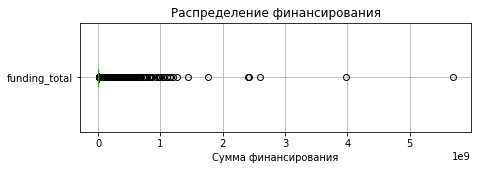

In [124]:
# Создадим диаграмму размаха для общей суммы финансирования
plt.figure(figsize=(7, 2))

filt_company_df.boxplot(column='funding_total', vert=False)

plt.title('Распределение финансирования')
plt.xlabel('Сумма финансирования')

plt.show()

Очень много данных близких к 0, выведем диаграмму размаха исключая выбросы. 

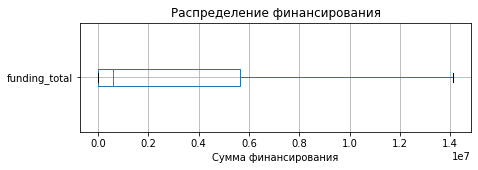

In [125]:
# Создадим диаграмму размаха для общей суммы финансирования без выбросов
plt.figure(figsize=(7, 2))

filt_company_df.boxplot(column='funding_total', showfliers=False, vert=False)

plt.title('Распределение финансирования')
plt.xlabel('Сумма финансирования')

plt.show()

In [126]:
# Выведем основные показатели
filt_company_df['funding_total'].describe().map('{:,.0f}'.format)

count           40,747
mean        10,135,610
std         56,464,360
min                  0
25%                  0
50%            600,000
75%          5,650,650
max      5,700,000,000
Name: funding_total, dtype: object

Типичная сумма финансирования компании - 600000. Выбивающиеся значения (выбросы) начинаются с суммы 1400000. 

В датасете большое количество нулевых значений финансирования, на это указывает 25-й процентиль распределения. Большое количество выбросов крупных значений, на это указывает график распределения с выбросами. Так же в основых показателях на это указывает среднее значение в соотношении с медианным значением, а так же разброс значений.


### Куплены за бесплатно?

In [127]:
# Объединим датасеты acqui_df и filt_company_df по идентификатору покупаемых компаний
acqui_company_df = filt_company_df.merge(acqui_df, left_on='company_id', right_on='acquired_company_id', how='left')
acqui_company_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
2,100.0,there,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.000000e+00,2005-05-29
3,1001.0,friendfeed,web,acquired,2007-10-01,NaN,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,4.750000e+07,2009-08-10
4,10014.0,mobclix,mobile,acquired,2008-03-01,NaN,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.000000e+00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,1344.0,vobile,web,operating,2005-01-01,NaN,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
40886,142181.0,stop being watched,software,operating,2010-06-10,NaN,stopbeingwatched.com,sbwinfonetwork,USA,0.0,1.0,500000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
40887,3429.0,zend technologies,software,operating,1999-01-01,NaN,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,NaN,NaN,NaN,NaN,NaN,NaT
40888,7748.0,flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT


In [128]:
# Фильтруем данные по условиям
filt_acqui_comp = acqui_company_df[(acqui_company_df['funding_total'] != 0) & (acqui_company_df['price_amount'] <= 1)]
filt_acqui_comp

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054.0,jumptap,mobile,acquired,2005-01-01,NaN,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
63,101312.0,sidetour,web,acquired,2011-06-01,NaN,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
66,101340.0,choicepass,enterprise,acquired,2011-07-01,NaN,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
67,10137.0,producteev,software,acquired,2008-07-08,NaN,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
68,10139.0,tradecard,enterprise,acquired,1999-01-01,NaN,tradecard.com,tradecard,USA,0.0,2.0,44925000.0,1.0,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99.0,amie street,web,acquired,2011-07-04,NaN,amiestreet.com,amiestreet_logs,USA,0.0,2.0,3900000.0,0.0,7024.0,317.0,99.0,NaN,0.0,2010-09-22
40836,9905.0,ubmatrix,software,acquired,2005-01-01,NaN,ubmatrix.com,NaN,USA,0.0,2.0,5172350.0,0.0,3381.0,41119.0,9905.0,NaN,0.0,2010-06-24
40840,992.0,wunderloop,advertising,acquired,1999-01-01,NaN,wunderloop.com,NaN,USA,0.0,1.0,10000000.0,1.0,9916.0,19182.0,992.0,NaN,0.0,2010-07-02
40854,997.0,zimbra,enterprise,acquired,2003-01-01,NaN,zimbra.com,zimbra,USA,0.0,1.0,14500000.0,3.0,9121.0,415.0,997.0,NaN,0.0,2013-07-15


Для расчёта верхней и нижней границы выбросов нам поможет метод IQR.

In [129]:
# Выведем основные показатели funding_total
filt_acqui_comp['funding_total'].describe().map('{:,.0f}'.format)

count            1,618
mean        18,152,962
std        144,503,027
min              3,750
25%          2,000,000
50%          6,000,000
75%         15,500,000
max      5,700,000,000
Name: funding_total, dtype: object

In [130]:
# Расчитаем основные показатели для столбца funding_total
Q3 = np.quantile(filt_acqui_comp['funding_total'], 0.75)
Q1 = np.quantile(filt_acqui_comp['funding_total'], 0.25)
IQR = Q3 - Q1
high = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

In [131]:
# Выведем результаты на экран
print(high)
print(low)

35750000.0
-18250000.0


Для нижней границы значение не может быть отрицательным, поэтому это будет 0.

In [132]:
# Найдём значение процентиля для верхней границы
p = filt_acqui_comp[filt_acqui_comp['funding_total'] < high].count() / (filt_acqui_comp['funding_total'].count())
p['funding_total']

0.9091470951792336

По итогам исследования процентиль для нижней границы составляет - 0, для верхней - 91.


### Цены стартапов по категориям

Для решения поставленной задачи воспользуемся датасетом `acqui_company_df`. Расчеты будем производить по параметру `price_amount` — сумма сделки.

In [133]:
# Зададим формат отображения и сгруппируем данные по категориям 
pd.set_option('display.float_format', lambda x: '%.0f' % x)
g = acqui_company_df.groupby('category_code')['price_amount'].agg(['count','median', 'std'])

In [134]:
# Отсортируем данные по медиане для компаний, которые покупали больше 2 раз
g[g['count'] > 2].sort_values(by=['median'], ascending = False).head()

,count,median,std
category_code,,,
manufacturing,29,72000000,969657968
real_estate,7,50000000,2505122913
automotive,5,43000000,2297757559
biotech,454,13200000,1540373521
hospitality,11,12500000,651449441


In [135]:
# Отсортируем данные по разбросу для компаний, которые покупали больше 2 раз
g[(g['count'] > 2)].sort_values(by=['std'], ascending = False).head()

,count,median,std
category_code,,,
enterprise,412,0,128088235060
public_relations,219,0,4059244205
real_estate,7,50000000,2505122913
automotive,5,43000000,2297757559
biotech,454,13200000,1540373521


Для каждой категории были расчитаны медиана, средний разброс и количество сделок. Для расчётов был выбран параметр `price_amount` так как он означает сумму покупки компании. Данные фильтровались по количеству сделок, чтобы исключить отсутствующие значения по разбросу. Решено обозначить по 5 категорий так как это число принято оптимальным.

Категории с самым большим медианным значением суммы сделки составили:
- manufacturing
- real_estate
- automotive
- biotech
- hospitality

Категории с самым большим размахом:
- enterprise
- public_relations
- real_estate
- automotive
- biotech

### Сколько раундов продержится стартап перед покупкой

In [136]:
# Сгруппируем данные по статусам
acqui_company_df.groupby('status')['funding_rounds'].median()

status
acquired    0
closed      1
ipo         1
operating   1
Name: funding_rounds, dtype: float64

Из полученных результатов можно сделать вывод, что выкупленные компании чаще просто выкупались без инвестирования. Для компаний в других статусах типичное число раундов - 1.   

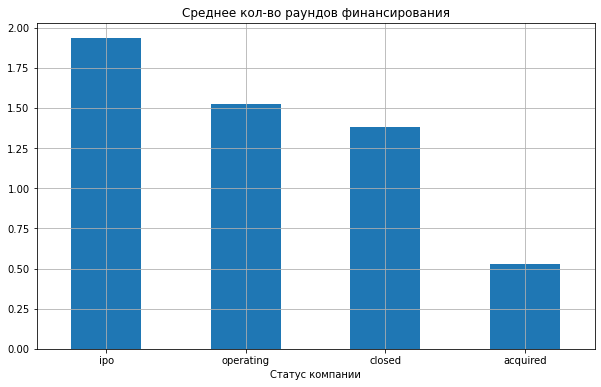

In [137]:
# Подготовим данные для визуализации
status_group = acqui_company_df.groupby('status')['funding_rounds'].mean().sort_values(ascending = False)

# Визуализируем результат
status_group.plot(kind='bar', 
                  rot=0, 
                  title=f'Среднее кол-во раундов финансирования',
                  figsize=(10,6))

plt.xlabel('Статус компании')
plt.grid()

plt.show()

Компании, которые впервые выставили свои акции на биржу, в среднем имеют большее количество раундов финансирования. Работающие и закрытые компании имеют примерно одинаковое значение ~1,5. Как было видно по данным выше выкупленные компании имеют наименьшее значение.


## Итоговый вывод и рекомендации

Предоставленные данные проанализированны и проведена первичная предобработка данных:
- Датасет `company_and_rounds`:
    - Столбцы `milestones`, `participants`, `is_first_round`, `is_last_round` оптимизированны по размерности;
    - Столбцы `founded_at`, `funded_at` приведены к типу `datetime64`;
    - Столбцы `name`, `network_username` приведены к нижнему регистру.
- Датасет `acquisition`:
    - Столбцы `id`, `acquiring_company_id`, `acquired_company_id` оптимизированны по размерности;
    - Столбец `acquired_at` приведен к типу `datetime64`.
- Датасет `people`:
    - Столбцы `first_name`, `last_name`, `network_username` — приведены к нижнему регистру.
- Датасет `education`:
    - Столбцы `id`, `person_id` оптимизированны по размерности данных;
    - Столбец `graduated_at` приведён к типу `datetime64`;
    - Столбец `instituition` приведён к нижнему регистру.
- Датасет `degrees`:
    - Столбец `id` — оптимизирован по размерности данных;
    - Столбец `subject` — приведён к нижнему регистру.

Пропущенные значения было решено оставить.

Проведено предварительное исследование:
- Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году. Количество раундов значительно увеличилось к 2013 году и является максимальным. Суммы финансирования пошли на повышение и сравнялись с результатами 2011 года.
- Среди всех категорий, больше всего самозанятых без образования, почти 60%. Четкой тенденции на снижение в зависимости от категории не прослеживается, до компаний от 26 сотрудников. Далее прослеживается спад к категории 100+.
- `network_username` имеет 95534 значений в датасете `car_df` и 38867 в `people_df`. `company_id` же имеет 217472 значений в `car_df` и 34615 в `people_df`. Пересечение данных у ключа `company_id` больше, поэтому использование `network_username` как самостоятельный ключ нецелесообразно.

В датасете `company_and_rounds` обнаружена четкая граница пропусков датасет разделили на два новых с дальнейшей предобработкой:
- Изначальный датасет `company_and_rounds` 22 столбцов, 217774 строк;
- `company_df` - 13 столбцов и 196553 строк с информацией о компаниях. По результатам предобработки удалены пропуски и явные дубликаты.
- `round_df` - 9 столбцов и 52928 строк с информацией о раундах финансирования. Удалены пропуски, дубликатов не обнаружено.

Подготовлен датасет `filt_company_df` под запросы заказчика, для дальнейшей работы. После фильтрации получен датасет в 40747 строк и 13 столбцов.

Итоги исследовательского анализа данных:
- Типичная сумма финансирования компании - 600000. Выбивающиеся значения (выбросы) начинаются с суммы 1400000. В данных много нулевых значений.
- Процентиль нижней границы - 0, значение 0. Процентиль верхней границы - 91, значение 35750000.
- Из полученных результатов можно сделать вывод, что выкупленные компании чаще просто выкупались без инвестирования. Для компаний в других статусах типичное число раундов - 1. Компании, которые впервые выставили свои акции на биржу, в среднем имеют большее количество раундов финансирования. Работающие и закрытые компании имеют примерно одинаковое значение ~1,5. Как было видно по данным выше выкупленные компании имеют наименьшее значение.